## Loan Eligibility Prediction for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

#### 1. Load the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

#### 2. Load the data

In [42]:
train = pd.read_csv('../input/loan-predction-logistic-regression/train.csv')
test = pd.read_csv('../input/loan-predction-logistic-regression/test.csv')
sample = pd.read_csv('../input/loan-predction-logistic-regression/sample_submission.csv')

#### 3. Exploratory Data Analysis (EDA)

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [7]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
train.shape , test.shape

((614, 13), (367, 12))

In [43]:
train_original=train.copy()
test_original=test.copy()

In [10]:
train['Loan_Status'].value_counts(dropna=False, normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [11]:
train['Gender'].value_counts(dropna=False, normalize=True)

Male      0.796417
Female    0.182410
NaN       0.021173
Name: Gender, dtype: float64

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

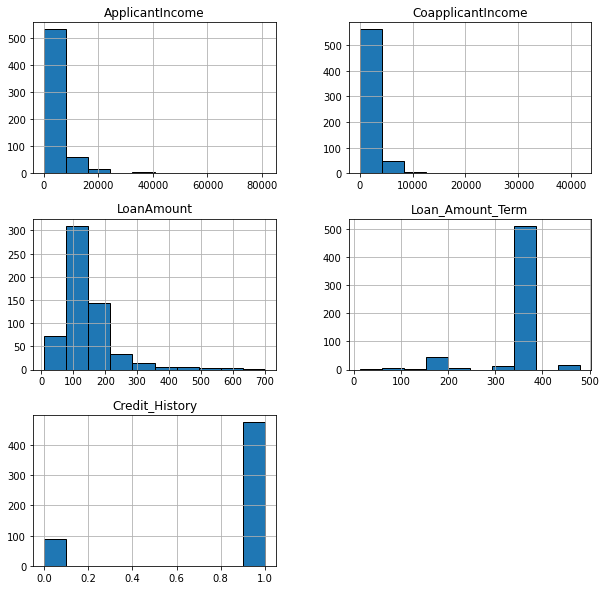

In [13]:
train.hist(edgecolor='black',figsize=(10,10))

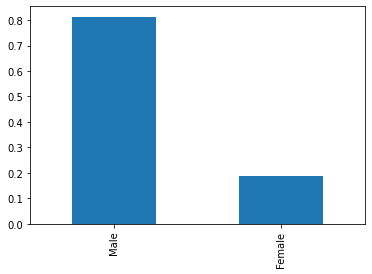

In [14]:
train['Gender'].value_counts(normalize=True).plot.bar()
plt.show()

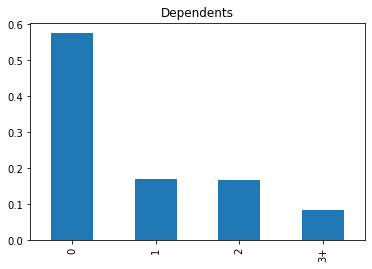

In [15]:
train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.show()

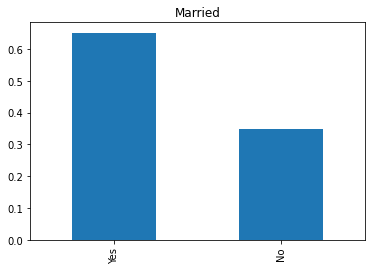

In [16]:
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()


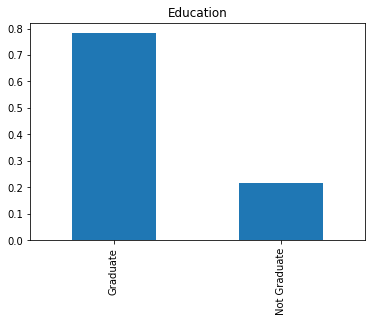

In [17]:
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()

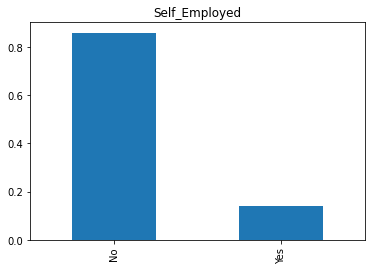

In [18]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()


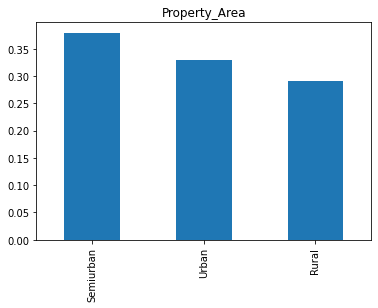

In [19]:
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

Let's see the boxplots for all the numeric features

<AxesSubplot:>

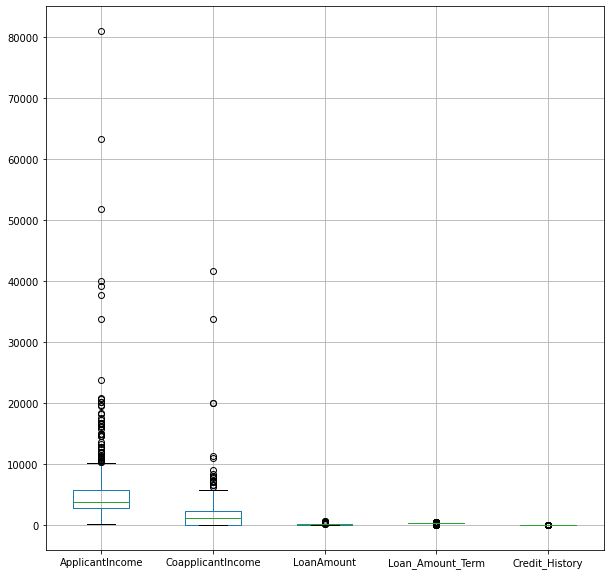

In [21]:
train.boxplot(figsize=(10,10))

**Let's plot the effect of different features on the output**

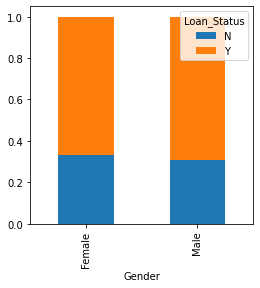

In [22]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

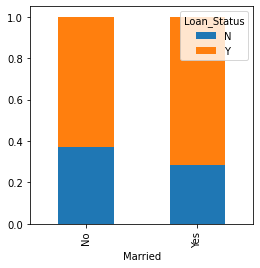

In [23]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()


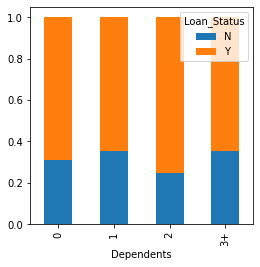

In [24]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

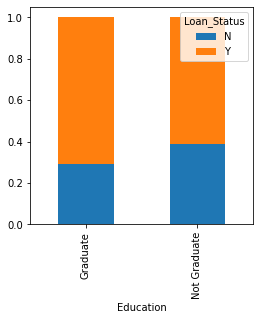

In [25]:
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

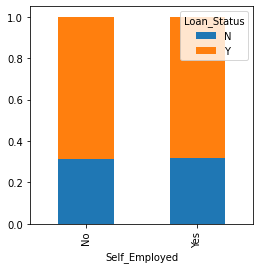

In [26]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

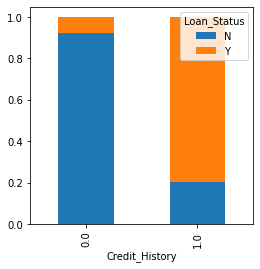

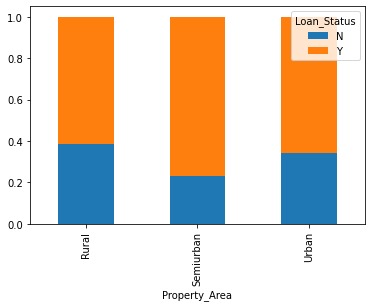

In [27]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

**Let's see the correlation between the features**

<AxesSubplot:>

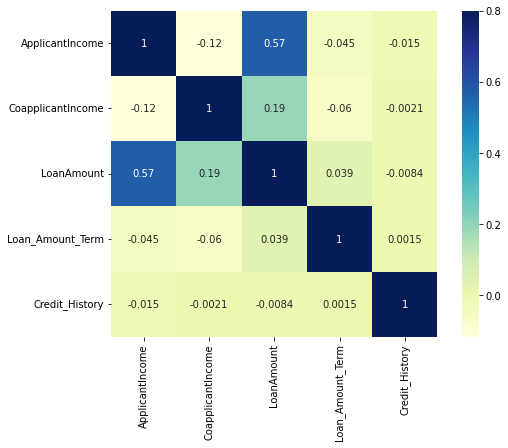

In [29]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="YlGnBu", annot = True)

#### 4. Data Preprocessing

**Let's fill the missing values in the training set.**<br>
We are using the most frequent value for a particular feature to fill as a replacement for the missing value

In [44]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [45]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train["Married"].fillna(train["Married"].mode()[0],inplace=True)
train["Dependents"].fillna(train["Dependents"].mode()[0],inplace=True)
train["Education"].fillna(train["Education"].mode()[0],inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)
train["Property_Area"].fillna(train["Property_Area"].mode()[0],inplace=True)

In [46]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [47]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Let's perform one hot encoding for non-numeric features**

In [48]:
data_One = pd.get_dummies(train[['Gender','Married','Education','Self_Employed','Property_Area']])

In [49]:
data_One.shape

(614, 11)

In [50]:
data_One.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,1,0,0,0,1
1,0,1,0,1,1,0,1,0,1,0,0
2,0,1,0,1,1,0,0,1,0,0,1
3,0,1,0,1,0,1,1,0,0,0,1
4,0,1,1,0,1,0,1,0,0,0,1


In [51]:
train  = train.drop(['Gender','Married','Education','Self_Employed','Property_Area'], axis =1)

In [52]:
pd.concat([train,data_One], axis=1)

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849,0.0,128.0,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,1,0,1,0,1,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,0,1,1,0,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.0,360.0,1.0,Y,1,0,1,0,1,0,1,0,1,0,0
610,LP002979,3+,4106,0.0,40.0,180.0,1.0,Y,0,1,0,1,1,0,1,0,1,0,0
611,LP002983,1,8072,240.0,253.0,360.0,1.0,Y,0,1,0,1,1,0,1,0,0,0,1
612,LP002984,2,7583,0.0,187.0,360.0,1.0,Y,0,1,0,1,1,0,1,0,0,0,1


In [53]:
train = pd.concat([train,data_One], axis=1)

In [54]:
train.shape


(614, 19)

In [55]:

train.Loan_Status=train.Loan_Status.map({"N":0,"Y":1})

In [56]:
train.Loan_Status

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [57]:
train.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849,0.0,128.0,360.0,1.0,1,0,1,1,0,1,0,1,0,0,0,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,1,0,1,0,1,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,1,0,0,1,0,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,0,1,1,0,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,1,0,1,0,0,0,1


In [58]:
train.isna().sum()

Loan_ID                    0
Dependents                 0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

####  5. Model Training (Logistic Regression)

In [79]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [80]:
X=train.drop("Loan_Status",1)
y=train.Loan_Status

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [81]:
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,128.0,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1


In [82]:
X['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [83]:
X.Dependents=X.Dependents.map({"3+":3,"0":0,"1":1,"2":2})

In [84]:
X['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

**Split the dataset by (70% for train - 30% for test)**

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=70)

In [86]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

**Evaluate the performance**

In [93]:
pred_LR=model.predict(X_test)

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.85      0.47      0.60        62
           1       0.78      0.96      0.86       123

    accuracy                           0.79       185
   macro avg       0.82      0.71      0.73       185
weighted avg       0.81      0.79      0.78       185



#### 6. Conclusion

We can see that the accuracy of the data is almost 80%. This is an adequette result given that Logistic regression is a simple model for classification. <br>
We can also notice that the f1 score for for Loan-accept class is 0.86 which is a moderate one. However, the f1-score for Loan-reject class is poor and merely 0.60. One of the probable reason behind this is that this dataset is highly imbalanced where two third of the data belongs to the Loan-accept class. THat's why the model perfors better for that class where underperforming for Loan-reject class.<br><br>
To improve the performance we can use more advanced models (Tree based classifiers) or any other models designed for for imbalance learning.
